## Bean counting using connected components and more to do multiple object detection

Now we have an image of many coffee beans and we want to count the number of coffee beans in the image.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc
from scipy import ndimage
import imageio

In [2]:
im_rgb = imageio.imread('data/IMG_4272.JPG')
original_gray = im_rgb[:,:,1] # take green channel to make grayscale image

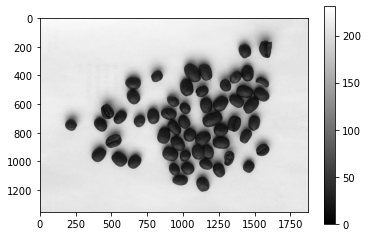

In [3]:
plt.imshow(original_gray, cmap='gray')
plt.colorbar();

Let's view our image is pseudocolor. This will be helpful for getting absolute intensity values from the images.

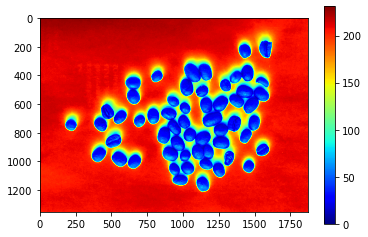

In [4]:
plt.imshow(original_gray, cmap='jet')
plt.colorbar();

One thing we may notice are some very small details in the image which will not help us perform our bean counting task.

In [5]:
im = ndimage.gaussian_filter(original_gray, sigma=10.0)

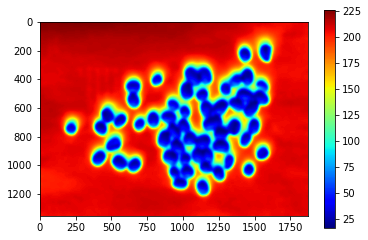

In [6]:
plt.imshow(im, cmap='jet')
plt.colorbar();

## Question Part A

We now want to pick a single threshold. Ideally, this will perfectly decompose our image into connected components of coffee beans and a background.

Enter a threshold and describe why you chose this value. Use the variable `threshold`.

In [7]:
# Enter your value here
threshold=60

(Here you should describe why you chose your particular threshold value.)

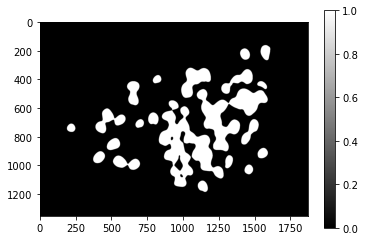

In [8]:
thresholded = (im < threshold).astype(np.uint8)
plt.imshow(thresholded, cmap='gray')
plt.colorbar();

Now, we are once again going to use [connected components labeling](https://en.wikipedia.org/wiki/Connected-component_labeling) to detect objects in our binary image.

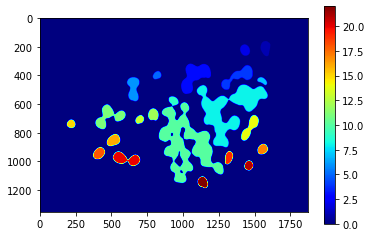

In [9]:
labels, num_labels = ndimage.label(thresholded)
plt.imshow(labels, cmap='jet')
plt.colorbar();

# Detour: erosion and dilation (morphological operations)

Here we will take a small detour to demonstrate some morphological operations. You can read about morphological image processing [here](https://en.wikipedia.org/wiki/Mathematical_morphology).

We will first perform `erosion` 30 times in a row on our thresholded image. What does the erosion do?

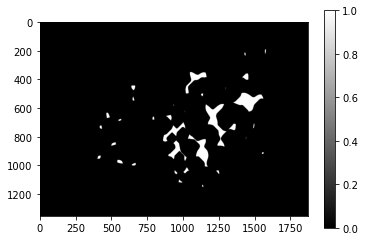

In [10]:
eroded = thresholded
for i in range(30):
    eroded = ndimage.binary_erosion(eroded)
plt.imshow(eroded.astype(np.uint8), cmap='gray')
plt.colorbar();

Now we will perform `dilation` 30 times in a row on our thresholded image. What does the dilation do?

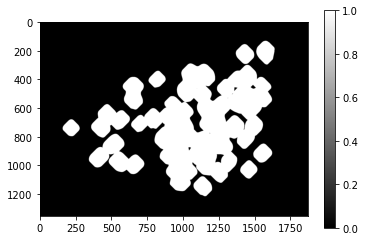

In [11]:
dilated = thresholded
for i in range(30):
    dilated = ndimage.binary_dilation(dilated)
plt.imshow(dilated.astype(np.uint8), cmap='gray')
plt.colorbar()

Now what about the combination of `erosion` with `dilation`?

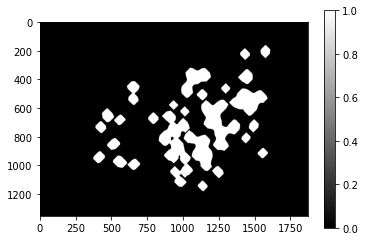

In [12]:
ed = thresholded
for i in range(30):
    ed = ndimage.binary_erosion(ed)
for i in range(30):
    ed = ndimage.binary_dilation(ed)
plt.imshow(ed.astype(np.uint8), cmap='gray')
plt.colorbar();

# End of detour - no more morphological operations

Let's view our connected components labels a bit larger.

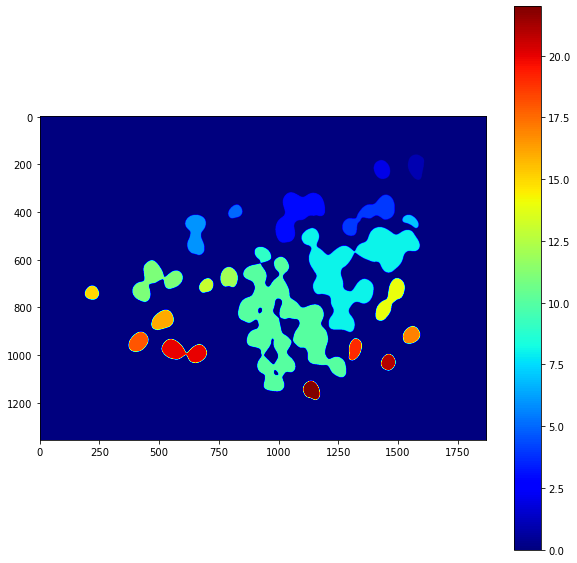

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
labels, num_labels = ndimage.label(thresholded)
plt.imshow(labels, cmap='jet')
plt.colorbar();

So, above are the labels for each connected component. Note that some individual coffee beans may be broken into two or more components and that sometimes multiple coffee beans may have been combined into one connected component.

Now we can calculate the "center of mass" of each connected component.

In [14]:
coms = ndimage.center_of_mass(thresholded, labels, index=range(1,num_labels))

## Question Part B

Change the parameters (and, if you like, change the processing steps) to label each coffee bean individually. Make a plot where each bean is marked with an "x".

You may like to change:

 - the image channel used (red, green, blue, an average of all channels, ...)
 - gaussian blur size
 - threshold used for binarization
 - optionally, any morphological image operations

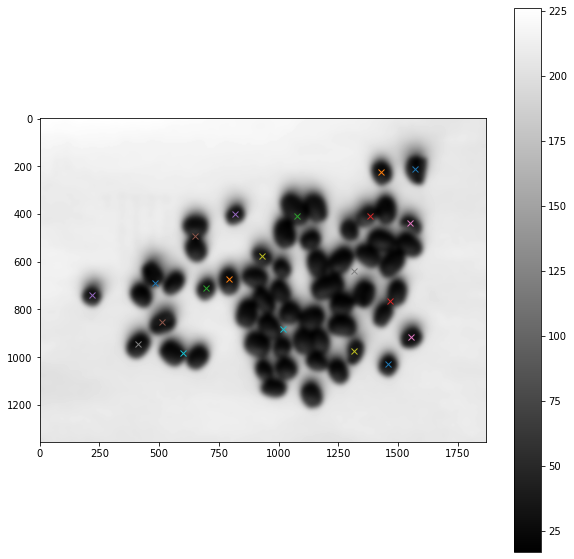

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
plt.imshow(im, cmap='gray')
plt.colorbar()
for com in coms:
    ax.plot([com[1]],[com[0]], 'x')   

## Question Part C

Describe what can go wrong when performing this connected components analysis to count and identify individual coffee beans. Name two possible problems and what do you see if each problem happens?

(Answer here.)